In [1]:
# Checks if a GPU is available and shows GPU info (driver, memory usage, etc.)
!nvidia-smi

Fri Mar 28 03:39:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Installs the default Java Runtime Environment (JRE)
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
openjdk version "11.0.26" 2025-01-21
OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [3]:
!pip install h2o

In [4]:
import h2o
h2o.init()
from h2o.automl import H2OAutoML
import seaborn as sns
import matplotlib.pyplot as plt

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4ay4binv
  JVM stdout: /tmp/tmp4ay4binv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4ay4binv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,11 hours and 39 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_bpjvbc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
# Ingesting data
df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(type(df))
print(df.types) # Illustrates the df schema
print(df.describe()) # Similar to pandas df syntax but the output is different

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
<class 'h2o.frame.H2OFrame'>
{'customerID': 'string', 'gender': 'enum', 'SeniorCitizen': 'int', 'Partner': 'enum', 'Dependents': 'enum', 'tenure': 'int', 'PhoneService': 'enum', 'MultipleLines': 'enum', 'InternetService': 'enum', 'OnlineSecurity': 'enum', 'OnlineBackup': 'enum', 'DeviceProtection': 'enum', 'TechSupport': 'enum', 'StreamingTV': 'enum', 'StreamingMovies': 'enum', 'Contract': 'enum', 'PaperlessBilling': 'enum', 'PaymentMethod': 'enum', 'MonthlyCharges': 'real', 'TotalCharges': 'real', 'Churn': 'enum'}


Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


None


In [6]:
# Manual splitting in training, testing, and evaluation (alternative is with 5-fold CV)
df_train, df_test, df_val = df.split_frame(ratios = [0.7, 0.15],
                                           seed=1234) # 'seed=1234' ensures the split will be the same

df_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [7]:
# Features and targets
y = 'Churn'
X = df.columns
X.remove(y) # y is the target
X.remove('customerID') # Exclude Customer ID from feature list

In [8]:
# Build model
automl = H2OAutoML(max_models = 10,
                   seed = 10,
                   exclude_algos = ['StackedEnsemble', 'DeepLearning'],
                   verbosity = 'info',
                   nfolds = 0)

In [9]:
# Train on df_train, validate on df_val (test separately after)
automl.train(X, y,
             training_frame = df_train,
             validation_frame = df_val)

AutoML progress: |
03:40:23.159: Project: AutoML_1_20250328_34022
03:40:23.185: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:40:23.186: Setting stopping tolerance adaptively based on the training frame: 0.014220565008492751
03:40:23.186: Build control seed: 10
03:40:23.186: training frame: Frame key: AutoML_1_20250328_34022_training_py_2_sid_b574    cols: 21    rows: 4945  chunks: 8    size: 266782  checksum: 6956190855063722343
03:40:23.187: validation frame: Frame key: py_4_sid_b574    cols: 21    rows: 1058  chunks: 8    size: 139028  checksum: 5038486677672008639
03:40:23.187: leaderboard frame: Frame key: py_4_sid_b574    cols: 21    rows: 1058  chunks: 8    size: 139028  checksum: 5038486677672008639
03:40:23.187: blending frame: NULL
03:40:23.187: response column: Churn
03:40:23.187: fold column: null
03:40:23.188: weights column: null
03:40:23.284: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250328_34022


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          21490                  7            14           9             27            31            29.44

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11861144989267149
RMSE: 0.3444001305061766
LogLoss: 0.368864803913769
Mean Per-Class Error: 0.19291628580722506
AUC: 0.8875539031811802
AUCPR: 0.7343614318388275
Gini: 0.7751078063623604

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3291384769505047
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     2987  636    0.1755   (636.0/3623.0)
Yes    278   1044   0.2103   (278.0/1322.0)
Total  3265  1680   0.1848   (914.0/4945.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.329138     0.695536  215
max f2                       0.139779     0.787274  305
max f0point5                 0.549756     0.688912  122
max accuracy                 0.43206      0.827098  171
max precision                0.903011     1         0
max recall                   0.0221942    1         384
max specificity              0.903011     1         0
max absolute_mcc             0.329138     0.573906  215
max min_per_class_accuracy   0.308955     0.804582  224
max mean_per_class_accuracy  0.284521     0.808109  234
max tns                      0.903011     3623      0
max fns                      0.903011     1321      0
max fps                      0.00790417   3623      399
max tps                      0.0221942    1322      384
max tnr                      0.903011     1         0
max fnr                      0.903011     0.999244  0
max fpr                      0.00790417   1         399
max tpr                      0.0221942    1         384

Gains/Lift Table: Avg response rate: 26.73 %, avg score: 26.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101112                   0.858504           3.4413     3.4413             0.92             0.872288   0.92                        0.872288            0.0347958       0.0347958                  244.13    244.13             0.0336917
2        0.0200202                   0.842844           3.58787    3.51384            0.959184         0.851423   0.939394                    0.861961            0.0355522       0.070348                   258.787   251.384            0.0686919
3        0.0301314                   0.82589            3.29168    3.43929            0.88             0.834938   0.919463                    0.852893            0.0332829       0.103631                   229.168   243.929            0.100319
4        0.0400404                   0.800685           3.35886    3.41939            0.897959         0.813184   0.914141                    0.843066            0.0332829       0.136914                   235.886   241.939            0.132222
5        0.0501517                   0.782883           3.21687    3.37856            0.86             0.790549   0.903226                  

In [10]:
# Prediction over test set
df_pred = automl.leader.predict(df_test)
df_pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.227239,0.772761
No,0.877627,0.122373
No,0.944938,0.055062
No,0.696512,0.303488
Yes,0.2248,0.7752
No,0.79575,0.20425
Yes,0.243207,0.756793
No,0.942821,0.0571791
Yes,0.280476,0.719524
No,0.647751,0.352249


In [11]:
# Model performance detail over test data
automl.leader.model_performance(df_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.13294547947024274
RMSE: 0.3646168941097529
LogLoss: 0.40694313667024573
Mean Per-Class Error: 0.22960303501606175
AUC: 0.8469749165419034
AUCPR: 0.6620028771341189
Gini: 0.6939498330838068

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2437404977425665
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     557   216    0.2794   (216.0/773.0)
Yes    48    219    0.1798   (48.0/267.0)
Total  605   435    0.2538   (264.0/1040.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.24374      0.623932  234
max f2                       0.141815     0.758134  287
max f0point5                 0.505676     0.62333   121
max accuracy                 0.515261     0.806731  117
max precision                0.885605     1         0
max recall                   0.0291378    1         372
max specificity              0.885605     1         0
max absolute_mcc             0.24374      0.478911  234
max min_per_class_accuracy   0.29825      0.76326   209
max mean_per_class_accuracy  0.24374      0.770397  234
max tns                      0.885605     773       0
max fns                      0.885605     265       0
max fps                      0.00840078   773       399
max tps                      0.0291378    267       372
max tnr                      0.885605     1         0
max fnr                      0.885605     0.992509  0
max fpr                      0.00840078   1         399
max tpr                      0.0291378    1         372

Gains/Lift Table: Avg response rate: 25.67 %, avg score: 26.34 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105769                   0.857287           3.54103    3.54103            0.909091         0.869111   0.909091                    0.869111            0.0374532       0.0374532                  254.103   254.103            0.0361595
2        0.0201923                   0.84534            3.89513    3.70965            1                0.851518   0.952381                    0.860733            0.0374532       0.0749064                  289.513   270.965            0.0736127
3        0.0307692                   0.829222           3.18693    3.52996            0.818182         0.838265   0.90625                     0.85301             0.0337079       0.108614                   218.693   252.996            0.104733
4        0.0403846                   0.800704           3.1161     3.43143            0.8              0.811221   0.880952                    0.84306             0.0299625       0.138577                   211.61    243.143            0.132108
5        0.05                        0.779641           3.50562    3.44569            0.9              0.794903   0.884615                    0.833799            0.0337079       0.172285                   250.562   244.569            0.164523
6        0.1                         0.65677            2.47191    2.9588             0.634615         0.72065    0.759615                    0.777225            0.123596        0.29588                    147.191   195.88             0.263539
7        0.15                        0.592398           1.94757    2.62172            0.5              0.618777   0.673077                    0.724409            0.0973783       0.393258                   94.7566   162.172            0.327282
8        0.2    

In [12]:
# Mode performance comparison
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20250328_34022,0.861095,0.395336,0.704581,0.238124,0.357134,0.127545
GLM_1_AutoML_1_20250328_34022,0.856815,0.404694,0.687636,0.232258,0.36159,0.130747
XGBoost_3_AutoML_1_20250328_34022,0.854721,0.403504,0.685445,0.242196,0.362998,0.131768
GBM_3_AutoML_1_20250328_34022,0.852968,0.406751,0.693768,0.232758,0.363515,0.132143
XRT_1_AutoML_1_20250328_34022,0.848536,0.414853,0.694724,0.227685,0.364003,0.132498
GBM_2_AutoML_1_20250328_34022,0.847422,0.412415,0.68349,0.243624,0.365492,0.133585
XGBoost_1_AutoML_1_20250328_34022,0.847276,0.413496,0.676429,0.223251,0.367164,0.13481
XGBoost_2_AutoML_1_20250328_34022,0.844347,0.421554,0.670197,0.241475,0.370512,0.137279
GBM_4_AutoML_1_20250328_34022,0.842003,0.422917,0.671798,0.230394,0.368836,0.13604
DRF_1_AutoML_1_20250328_34022,0.840087,0.476577,0.668233,0.238689,0.368887,0.136077


In [13]:
# List all models
model_ids = list(automl.leaderboard['model_id'].as_data_frame().iloc[0:, 0])
model_ids

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['GBM_1_AutoML_1_20250328_34022',
 'GLM_1_AutoML_1_20250328_34022',
 'XGBoost_3_AutoML_1_20250328_34022',
 'GBM_3_AutoML_1_20250328_34022',
 'XRT_1_AutoML_1_20250328_34022',
 'GBM_2_AutoML_1_20250328_34022',
 'XGBoost_1_AutoML_1_20250328_34022',
 'XGBoost_2_AutoML_1_20250328_34022',
 'GBM_4_AutoML_1_20250328_34022',
 'DRF_1_AutoML_1_20250328_34022']

In [14]:
# Convert the H2O leaderboard to a pandas DataFrame
lb_df = automl.leaderboard.as_data_frame()

# Check the available columns
print(lb_df.columns)

Index(['model_id', 'auc', 'logloss', 'aucpr', 'mean_per_class_error', 'rmse',
       'mse'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [15]:
# Check if 'f1' is in the columns, calculate and add it if not
if 'f1' not in lb_df.columns:
    lb_df['f1'] = 2 * lb_df['auc'] * (1 - lb_df['logloss']) / (lb_df['auc'] + (1 - lb_df['logloss']))
    print("Warning: 'f1' not found in original leaderboard, estimated from other metrics.")

# Sort leaderboard by F1 score in descending order
sorted_by_f1 = lb_df.sort_values('f1', ascending = False)
print(sorted_by_f1[['model_id', 'f1']])

                            model_id        f1
0      GBM_1_AutoML_1_20250328_34022  0.710448
2  XGBoost_3_AutoML_1_20250328_34022  0.702635
1      GLM_1_AutoML_1_20250328_34022  0.702513
3      GBM_3_AutoML_1_20250328_34022  0.699788
5      GBM_2_AutoML_1_20250328_34022  0.693979
6  XGBoost_1_AutoML_1_20250328_34022  0.693175
4      XRT_1_AutoML_1_20250328_34022  0.692647
7  XGBoost_2_AutoML_1_20250328_34022  0.686550
8      GBM_4_AutoML_1_20250328_34022  0.684815
9      DRF_1_AutoML_1_20250328_34022  0.644984


In [16]:
out = h2o.get_model([mid for mid in model_ids if 'XGBoost' in mid][0])
out.params # This has too much information
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [17]:
out.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,811.713318,1.000000,0.194905
1,tenure,625.522949,0.770621,0.150198
2,OnlineSecurity.No,472.311707,0.581870,0.113409
3,MonthlyCharges,449.038025,0.553198,0.107821
4,TotalCharges,440.876312,0.543143,0.105861
5,TechSupport.No,321.970184,0.396655,0.077310
6,InternetService.DSL,158.201965,0.194899,0.037987
7,PaperlessBilling.No,83.710182,0.103128,0.020100
8,PaymentMethod.Electronic check,81.276115,0.100129,0.019516
9,Contract.Two year,55.853027,0.068809,0.013411


In [18]:
# Confusion matrix over the XGBoos model
perf = out.model_performance(df_test)
conf_matrix = perf.confusion_matrix()
cm_df = conf_matrix.table.as_data_frame()
print(cm_df)

             No    Yes   Error             Rate
0     No  578.0  195.0  0.2523    (195.0/773.0)
1    Yes   66.0  201.0  0.2472     (66.0/267.0)
2  Total  644.0  396.0   0.251   (261.0/1040.0)


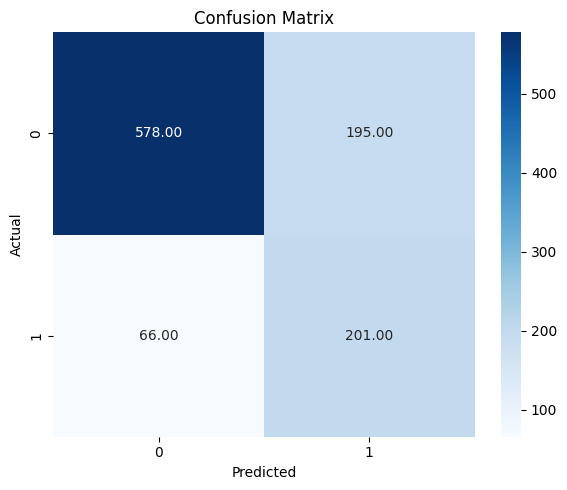

In [19]:
# Get the confusion matrix as a data frame
cm_df = conf_matrix.table.as_data_frame()

# Extract the raw matrix values
raw_cm = cm_df.iloc[0:2,1:3].values #Selecting only the 2x2 confusion matrix and converting it to numpy array

plt.figure(figsize=(6, 5))
sns.heatmap(raw_cm, annot=True, fmt='.2f', cmap='Blues') # Changed fmt to '.2f' to display floats with 2 decimal places
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()